## NLTK 패키지 설치

pip install nltk

## 말뭉치
- 말뭉치(Corpus)
    - 텍스트분석에 필요한 텍스트 데이터
- 웹크롤링(web crawling) 등으로 수집
- 텍스트 처리 패키지에서 제공하는 샘플 말뭉치 사용
- 국립국어원에 있는 세종copus는 open source로 licence가 풀리지는 않음

### step1: 샘플 말뭉치 다운로드

In [1]:
%%time
import nltk
nltk.download("book")
nltk.download("movie_reviews")
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_da

Wall time: 54min 47s


[nltk_data]   Package stopwords is already up-to-date!


True

### step 2: 구텐베르그 말뭉치 목록

In [9]:
import nltk

In [10]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [11]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:702])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


## 토큰화

    - 토큰화(Tokenizing)
        - 말뭉치(텍스트 데이터)를 "토큰"이라고 불리는 작은 단위로 나누는 행위
        
    - 토큰(Token)
        - 문장, 단어, 형태소 등 분석에 있어서 의미를 가지는 단위
        
    - 토큰의 명칭
        - 토큰의 이름은 실제 토큰의 활용과 관계가 없다.
        - 숫자 혹은 기호로 나타내거나 품사등을 덧붙여서 쓰는 경우도 있음

### step 1: 토큰화
    - NLTK의 word_tokenize 함수 사용

In [12]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [13]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

### step 2: 어간추출
    - NLTK의 PorterStemmer LancastersTemmer 사용

In [15]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


### step 3: 표제어 추출
    - NLTK의 wordNetLemmatizer사용

In [16]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos="v") for w in words] # 동사임을 지정

['fly', 'fly', 'fly', 'fly', 'fly']

    - NLTK의 pos_tag 사용

In [17]:
# 최종 결과물이 tuple의 list로 나온다.
from nltk.tag import pos_tag

sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [18]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [20]:
# 영어 분석할 때 큰 도움이 안되는 단어들
from nltk.corpus import stopwords

stopwords.words("english")[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

## Text 클래스

NLTK의 Text ㅋㄹ래스는 문서 분석에 유용한 여러가지 메서드를 제공한다.

- plot: 딘어 빈도 그래프
- dispersion_plot:단어 위치 그래프
- concordance: 단어 문맥 인쇄
- similar: 유사한 단어 검색
- plot: 빈도 그래프

### stpe1: 클래스 객체 생성

In [23]:
# 원문을 토크나이징하여 token의 리스트로 만들어 text안에 넣는다.
from nltk import Text

text = Text(word_tokenize(emma_raw))

### step 2: 단어 빈도 그래프

plot 메소드를 사용하면 각 단어(토큰)의 사용 빈도를 그래프로 그려준다.

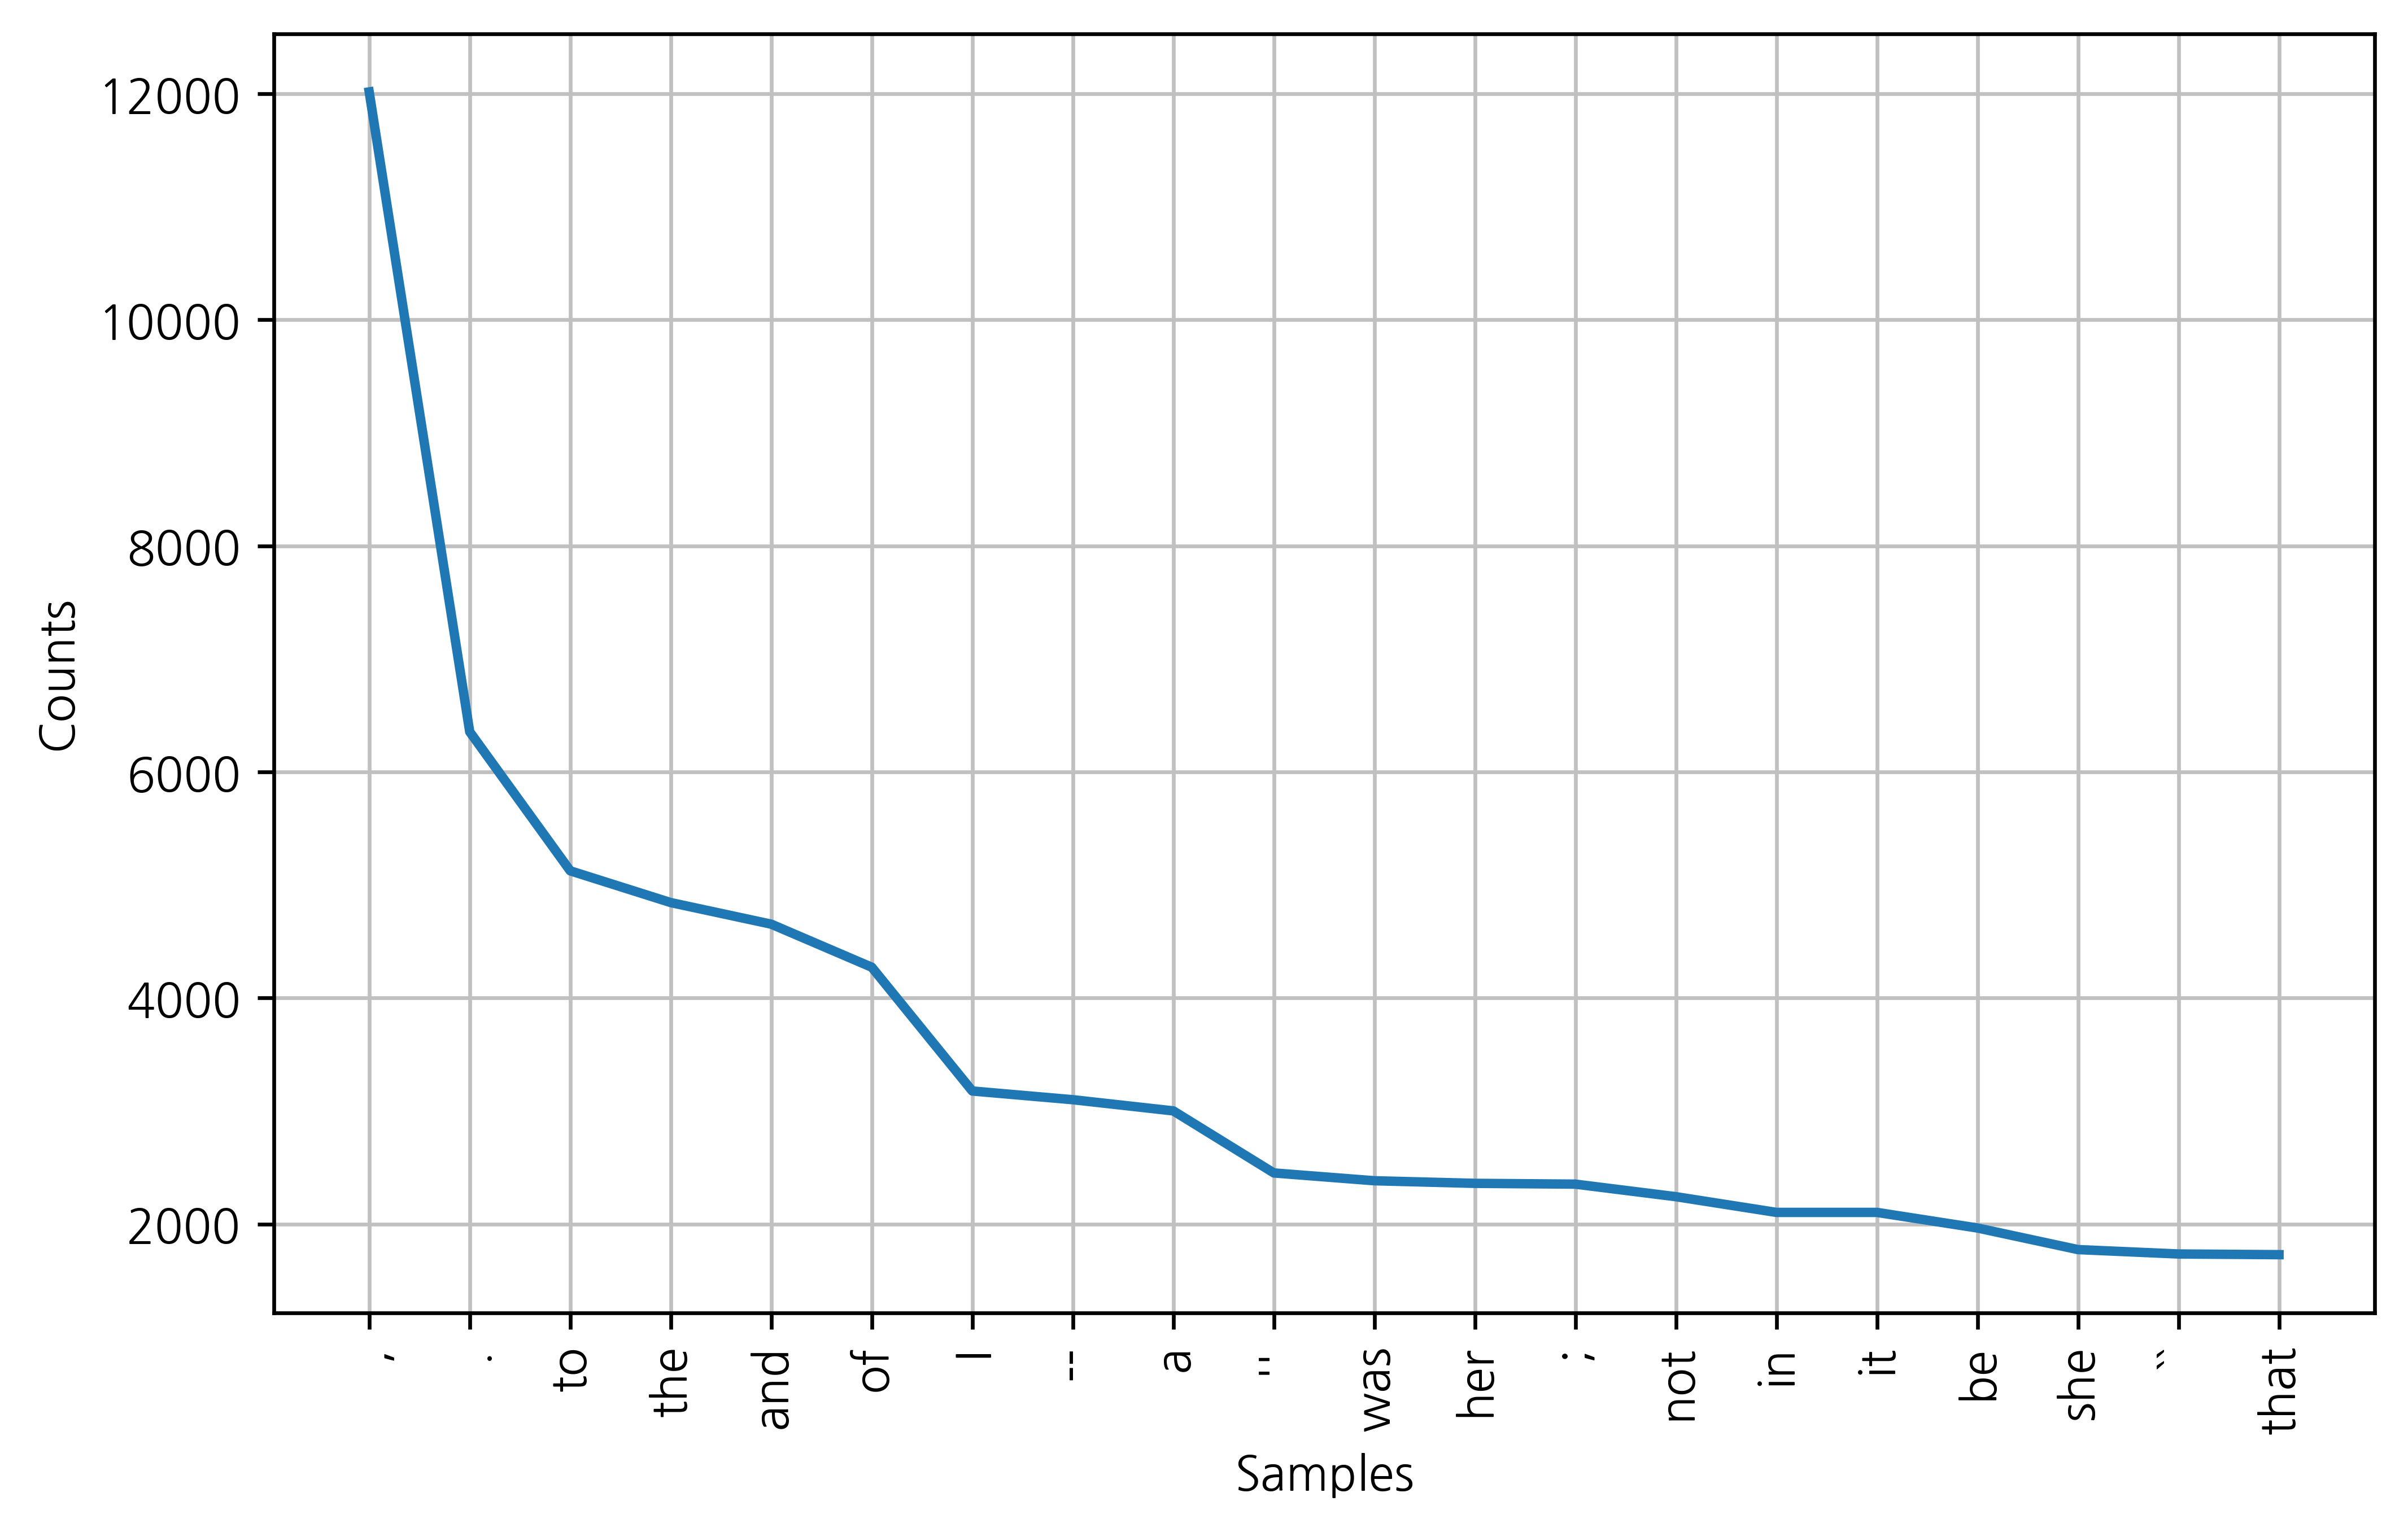

In [24]:
# 가장 많이 사용되는 20개 단어의 사용 빈도를 그려라
text.plot(20)
plt.show()

### step3: 단어 위치 그래프

dispersion_plot 메서드는 단어가 사용된 위치를 시각화 한다. 소설 엠마의 각 등장인물에 대해 적용하면 다음과 같은 결과를 얻는다.

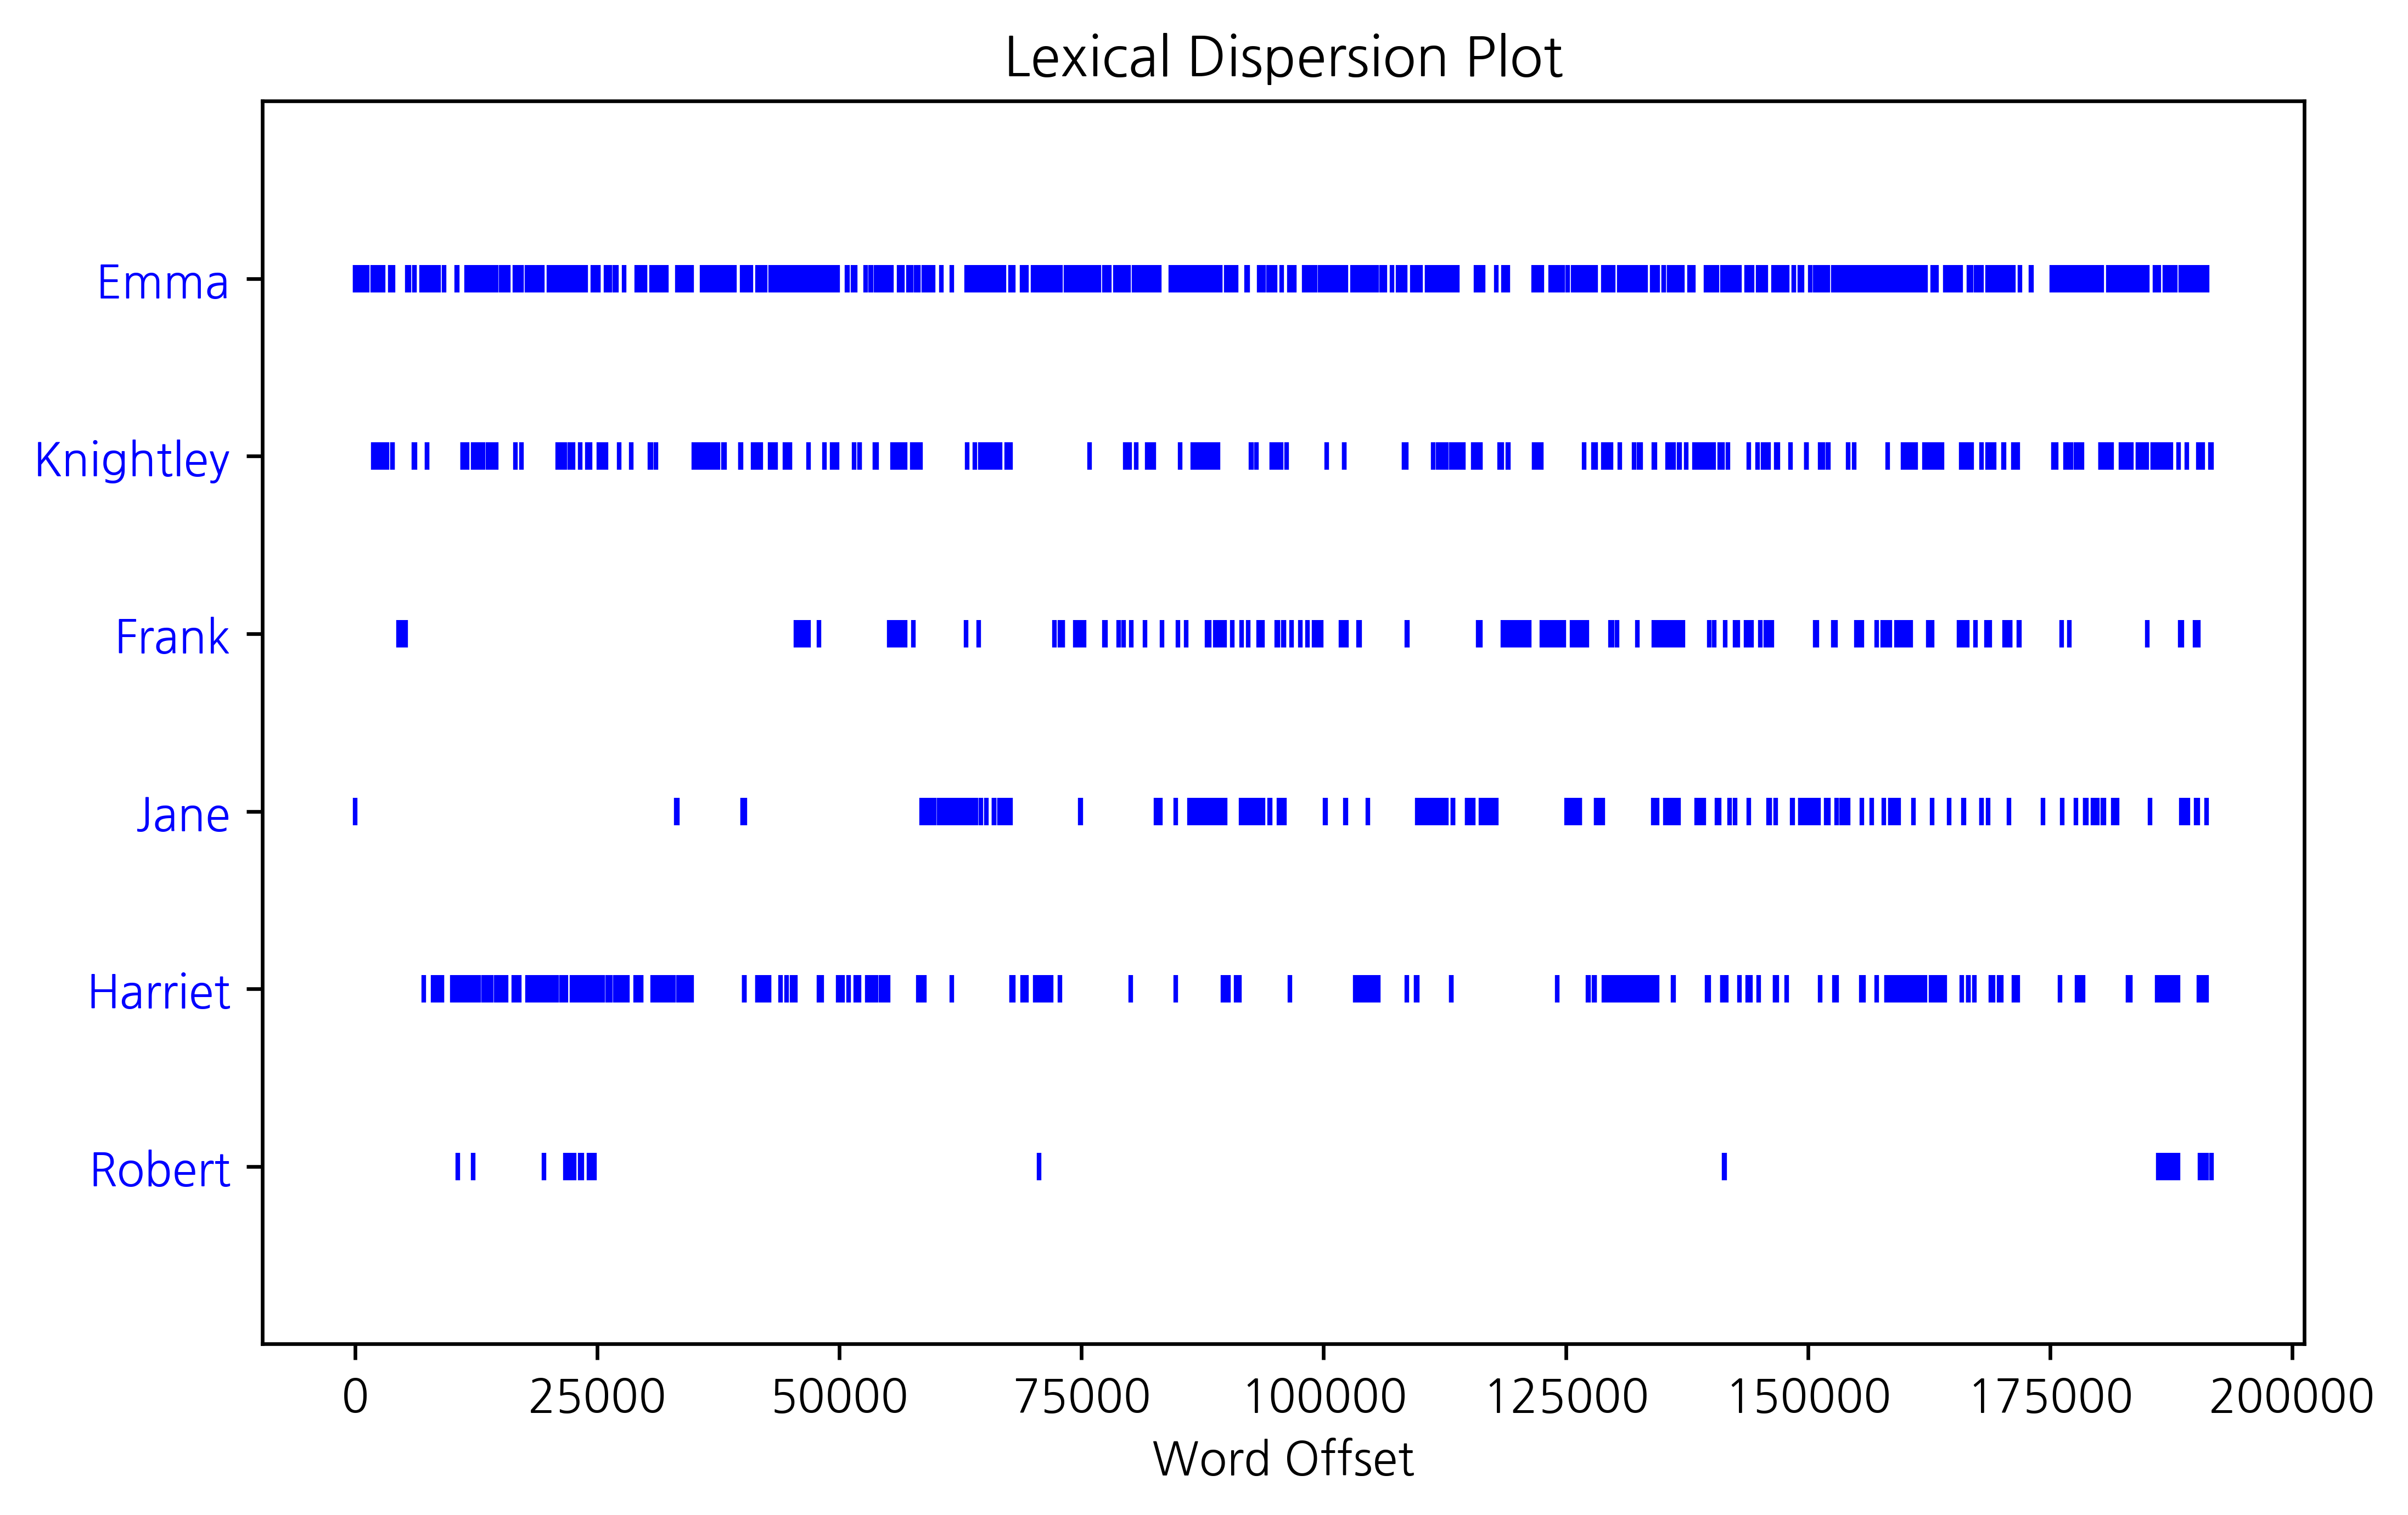

In [25]:
text.dispersion_plot(["Emma","Knightley", "Frank", "Jane", "Harriet", "Robert"])

### step 4: 단어 문맥 인쇄

concordance 메서드로 단어가 사용된 위치를 직접 표시하면 문맥(context)이 어떤지 볼 수 있다. 여기에서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다.

In [26]:
text.concordance("Emma")

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

### step 5: 유사 단어 검색

similar 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다.

In [27]:
# 윈도우가 1
text.similar("Emma", 1)

she


### step 6: 공통 문맥 인쇄

두 단어의 공통 문맥을 보려면 common_contexts 메서드를 사용한다.

In [30]:
text.common_contexts(["Emma", "she"], 1)
# 윈도우를 1로 놨을 때 but Emma was or but she was 와 같은 문맥이 많이 사용되었다.

but_was


## FreqDist 클래스

    - FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다.
    - Text 클래스의 vocab 메서드로 추출 할 수 있다.
    - 토큰 리스트를 넣어서 직접 만들 수도 있다.
    
    - 빈도 분석에 유용한 여러가지 메서드를 제공한다.
    
        - N: 빈도(횟수)
        - freq: 빈도(퍼센트)
        - most_commmon: 가장 많이 나오는 단어
        - plot: 가장 많이 나오는 단어 플롯

### step 1: Text 클래스에서 생성

In [31]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

### step2: 토큰 리스트에서 생성

    - 다음 코드에서는 Emma 말뭉치에서 사람의 이름(NNP)만 모아서 FreqDist 클래스 객체를 만들었다.
    
    - 품사 태그에서 NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거하였다.

In [35]:
# NNP로 잡히는 stop words를 빼고 이름의 리스트를 만들고, 이름에 대한 FreqDist를 만든다.(중요!)
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.","Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

### step 3: 단어 빈도 분석

FreqDist 클래스는 단어를 키(Key), 출현빈도를 값(value)으로 가지는 사전 자료형과 유사하다. 다음코드는 전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률을 각각 계산한다.

In [36]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(6924, 829, 0.11972848064702483)

In [38]:
# Emmna 중에 일부는 NNP로 안잡힘
emma_raw.count("Emma")

865

most_common 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [39]:
fd_name.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

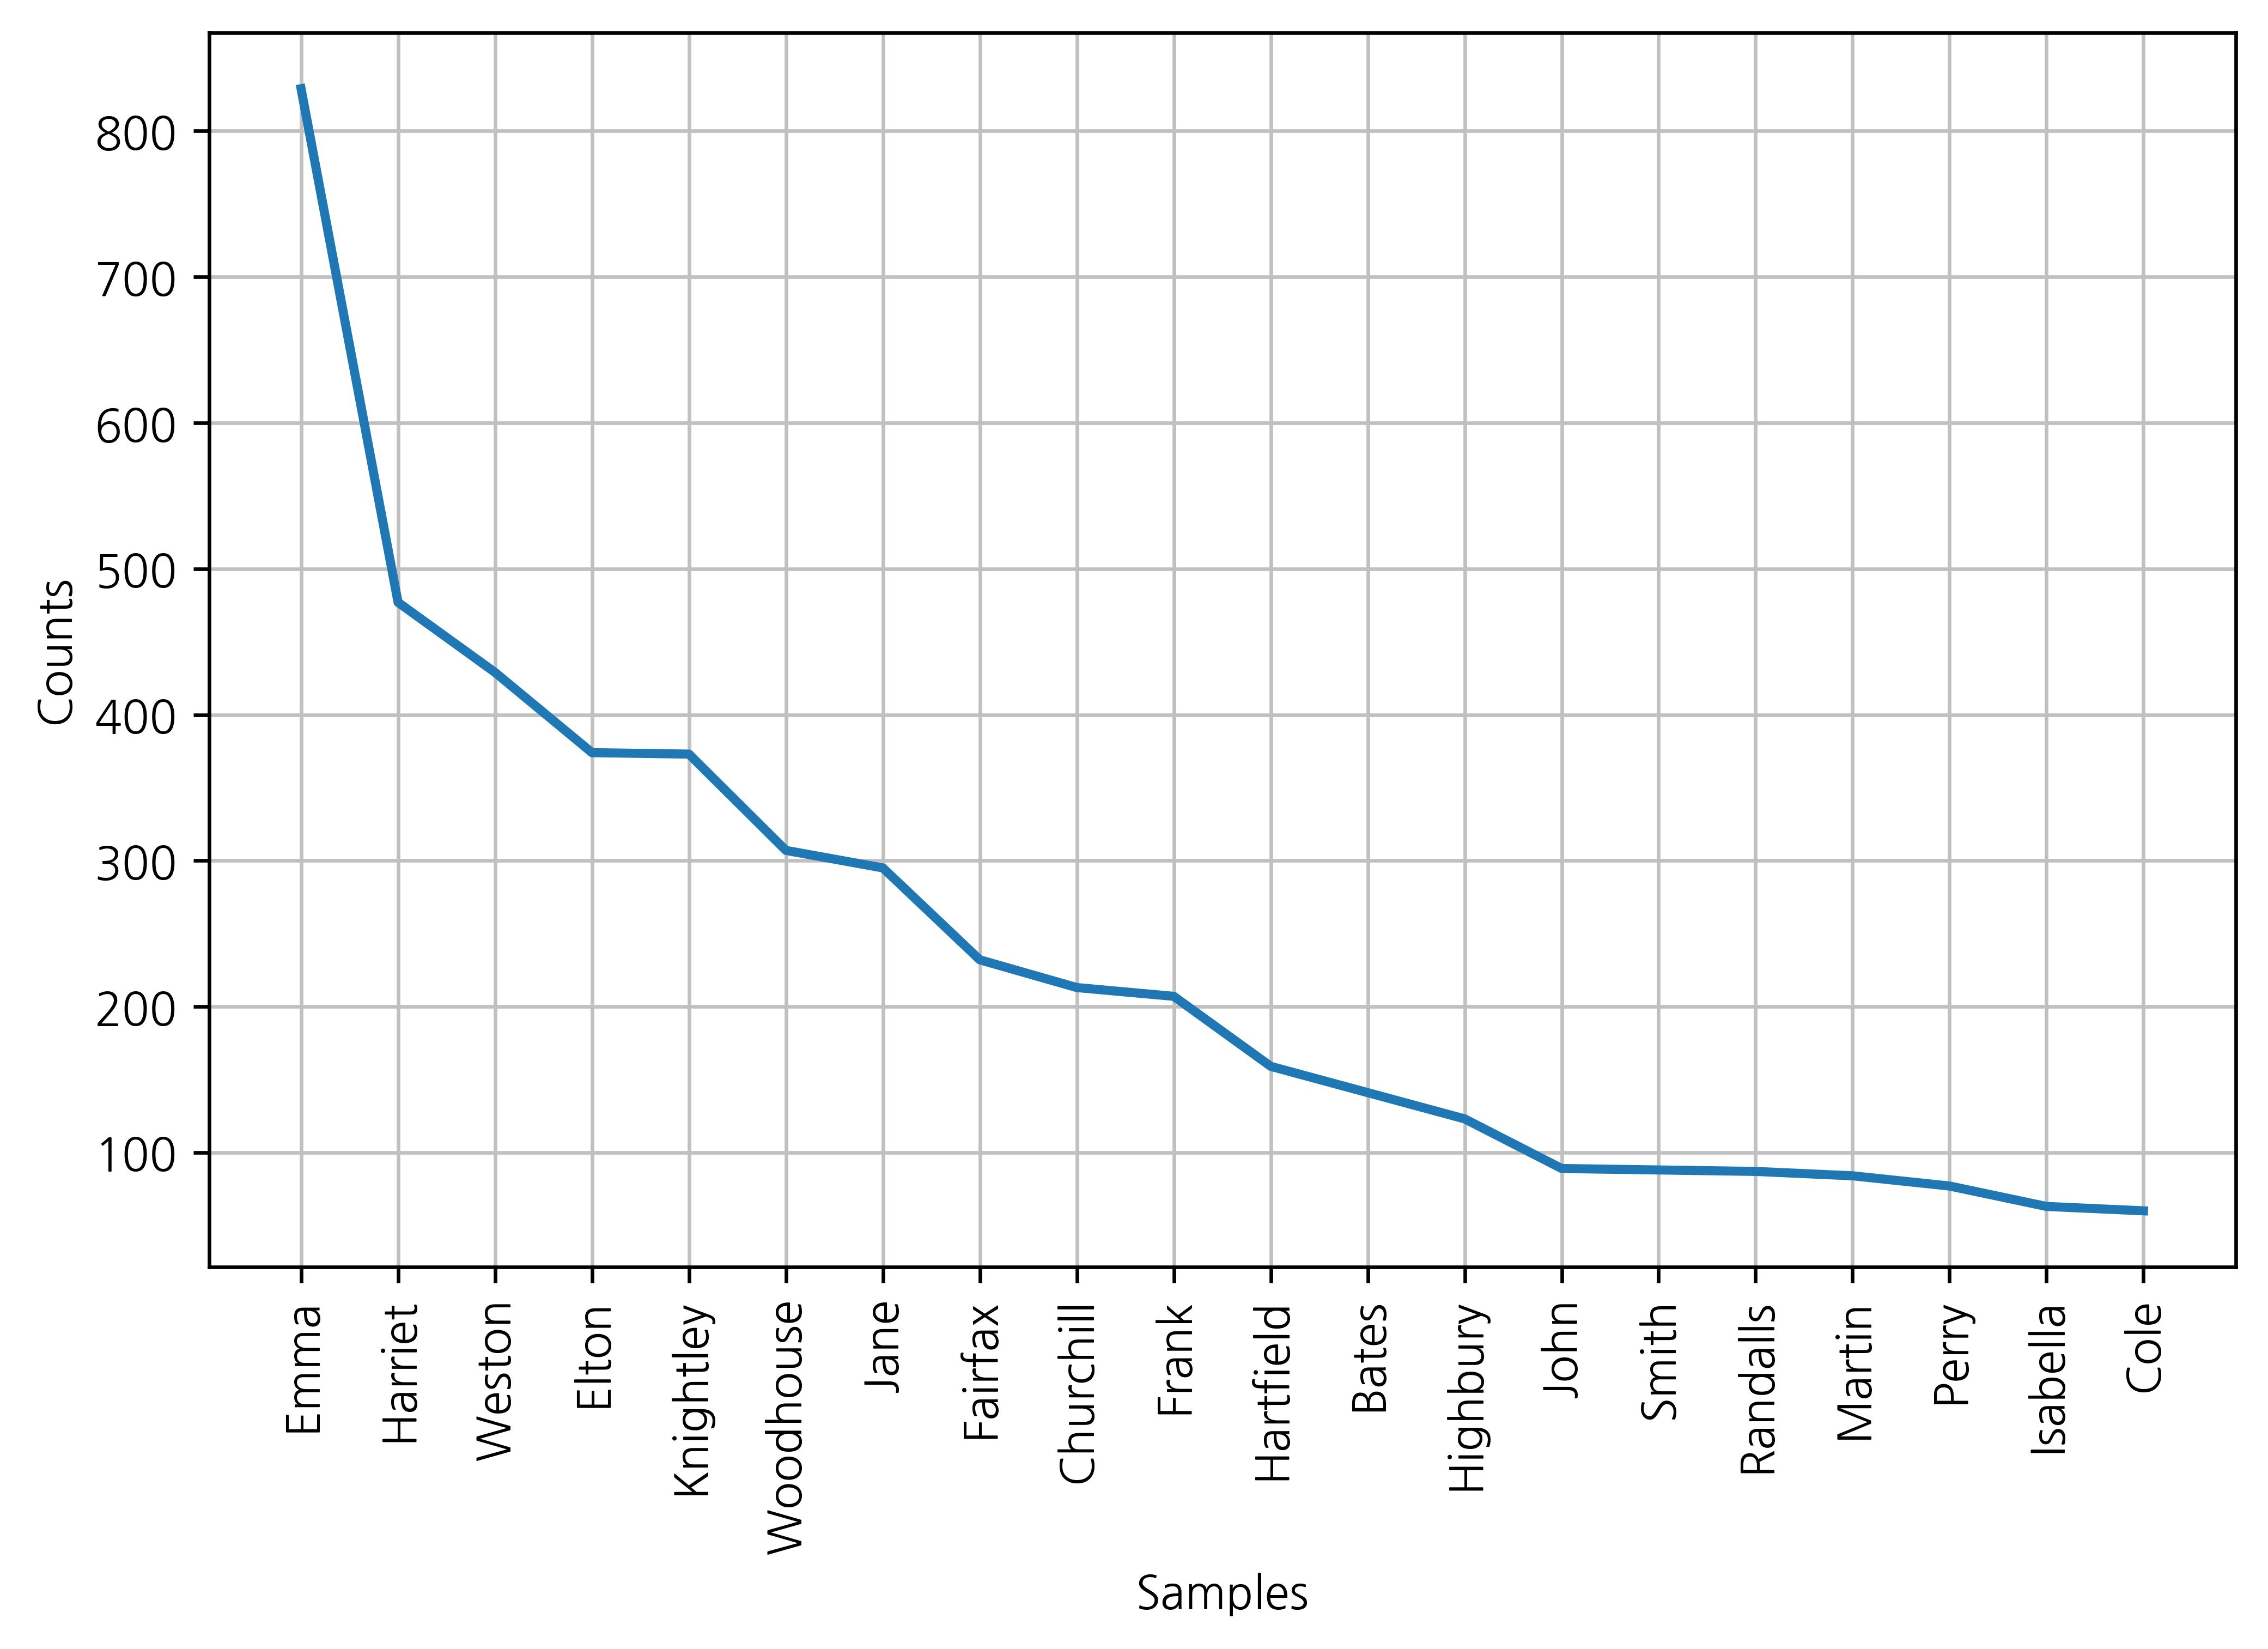

In [40]:
fd_names.plot(20)
plt.show()

## 워드클라우드

wordcloud 패키지를 사용하면 단어의 사용 빈도수에 따라 워드클라우드(Word Cloud)시각화를 할 수 있다.

## wordcloud 패키지 설치

pip install wordcloud

또는

conda install wordcloud -c conda-forge


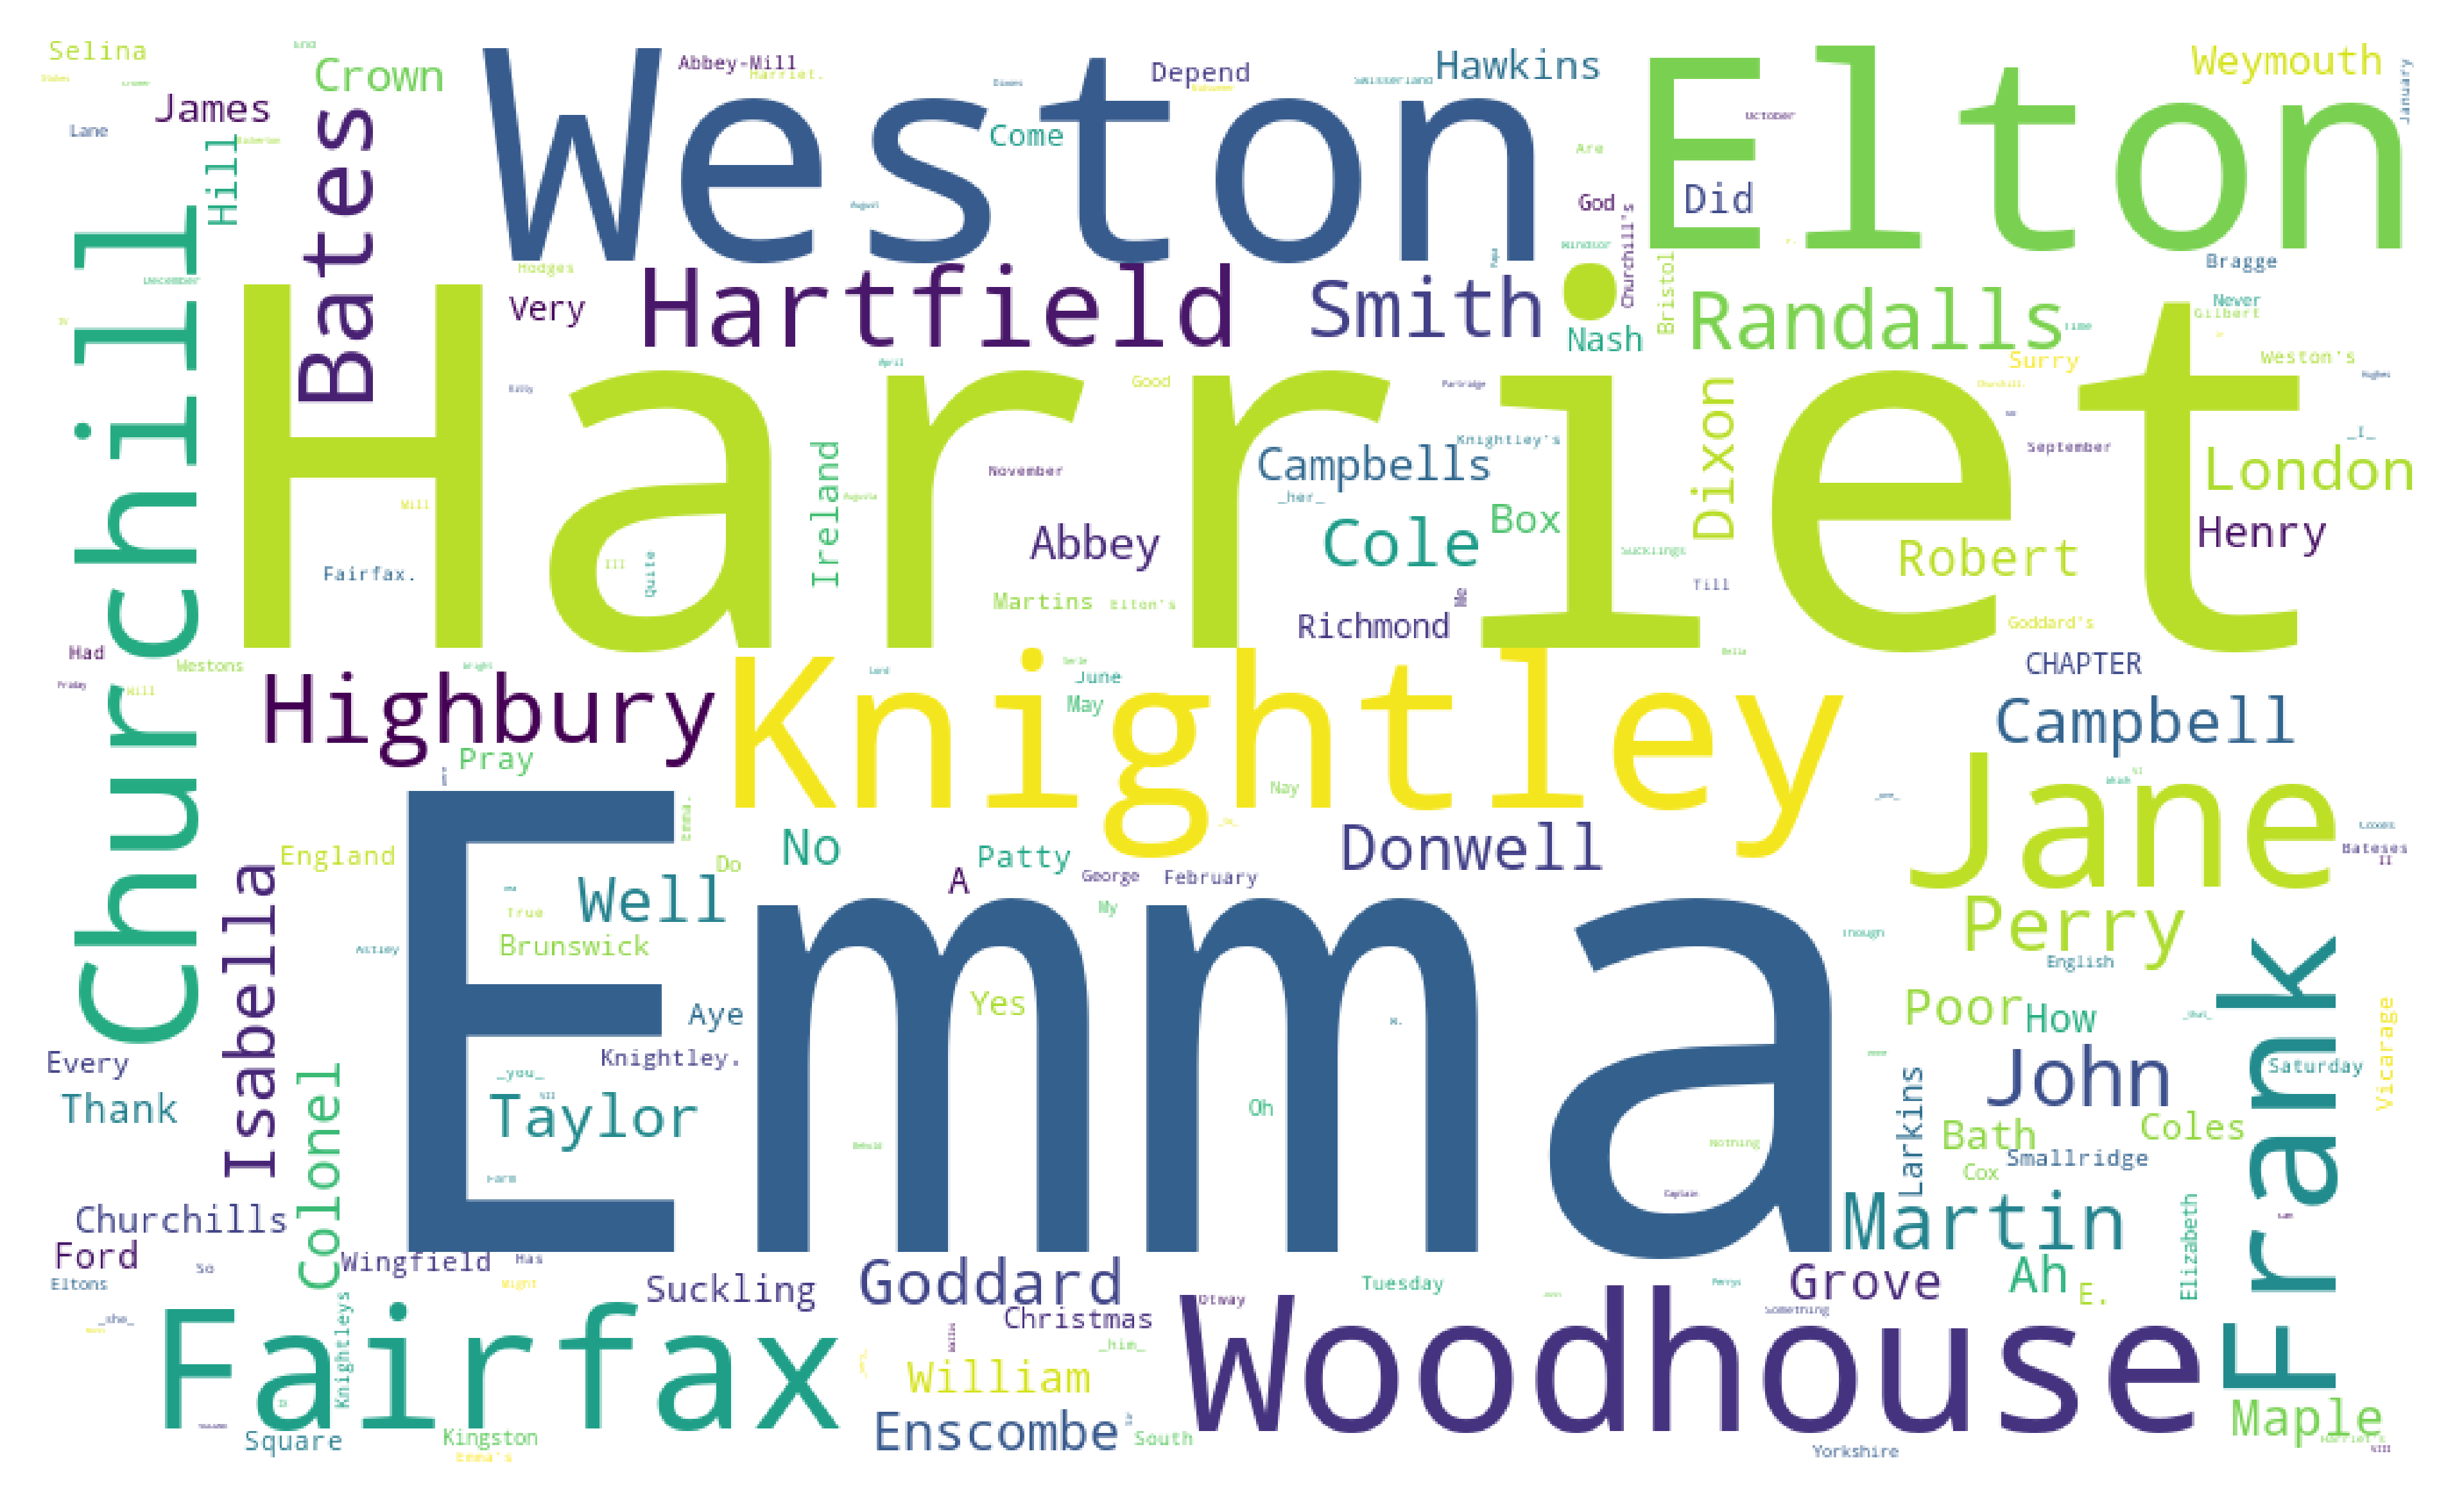

In [41]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

# 연습문제: 소설 등장인물 워드클라우드 제작

    구텐베르그 프로젝트의 소설 말뭉치 중 하나를 골라서 등장인물 이름의
    빈도 플롯과 워드클라우드를 제작하라.

In [42]:
hamlet_raw = nltk.corpus.gutenberg.raw("shakespeare-hamlet.txt")

In [43]:
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.","Miss", "Mr", "Mrs", "Dear"]
hamlet_tokens = pos_tag(word_tokenize(hamlet_raw))
names_list = [t[0] for t in hamlet_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

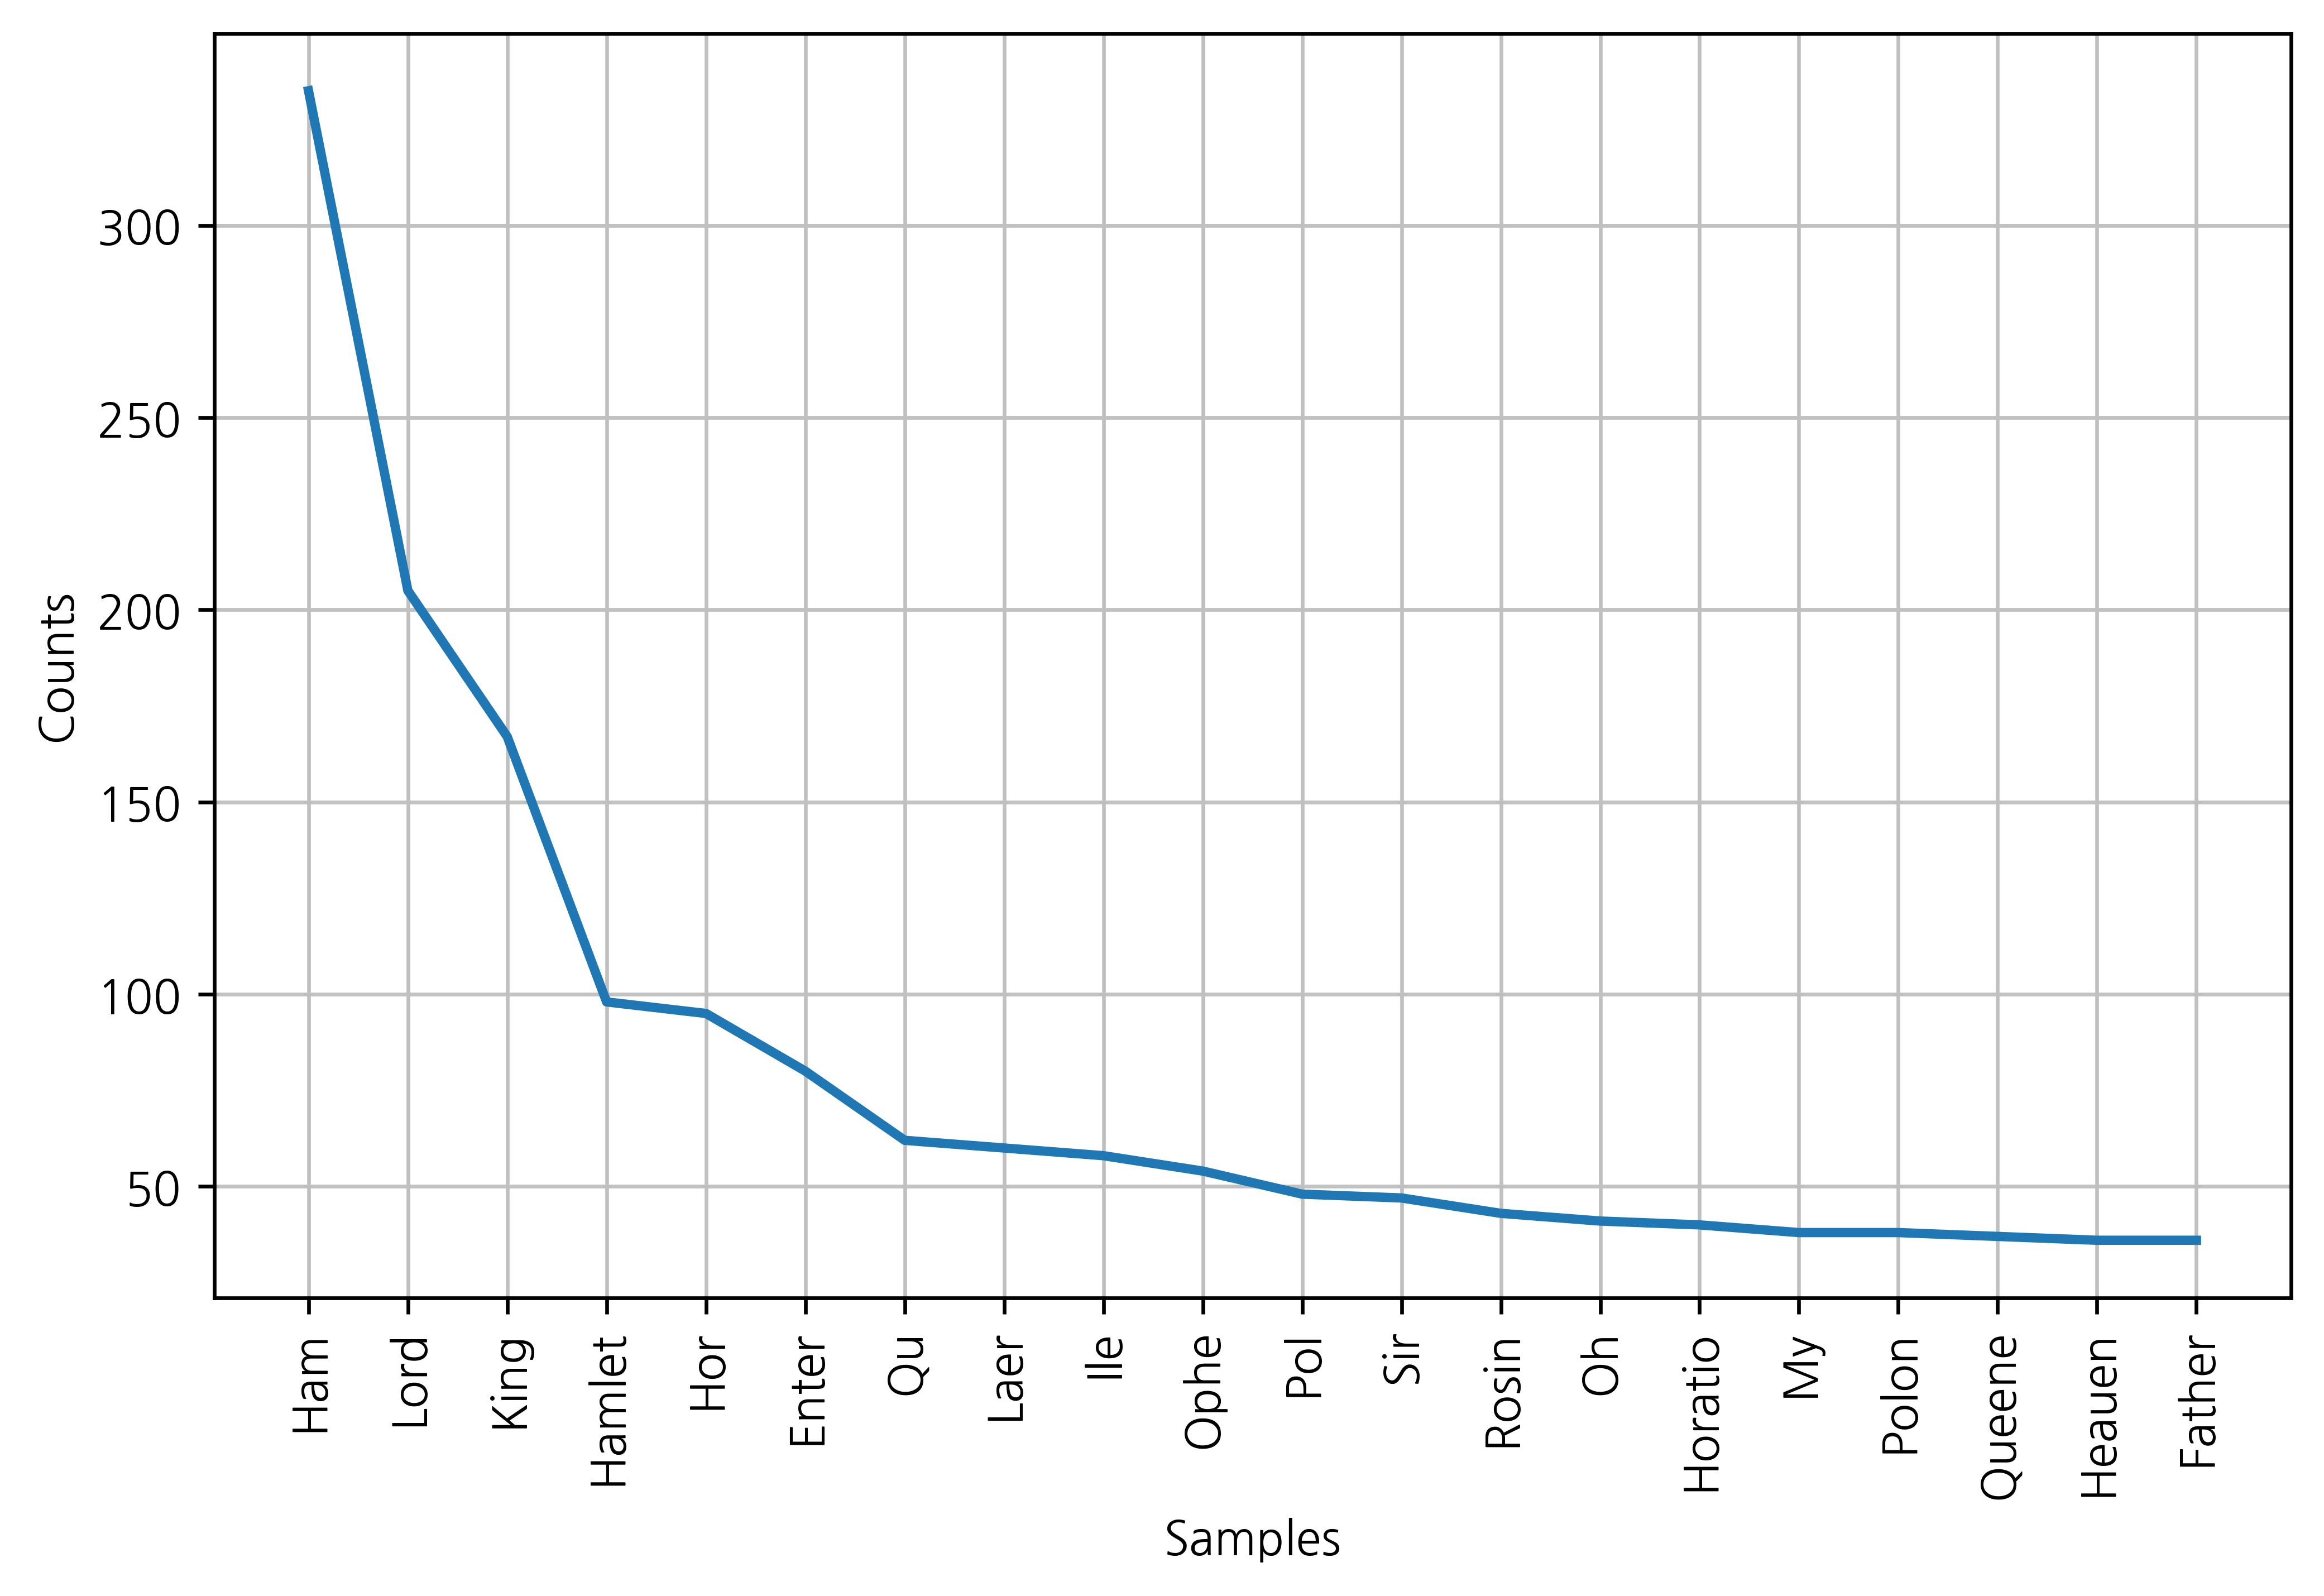

In [44]:
fd_names.plot(20)
plt.show()

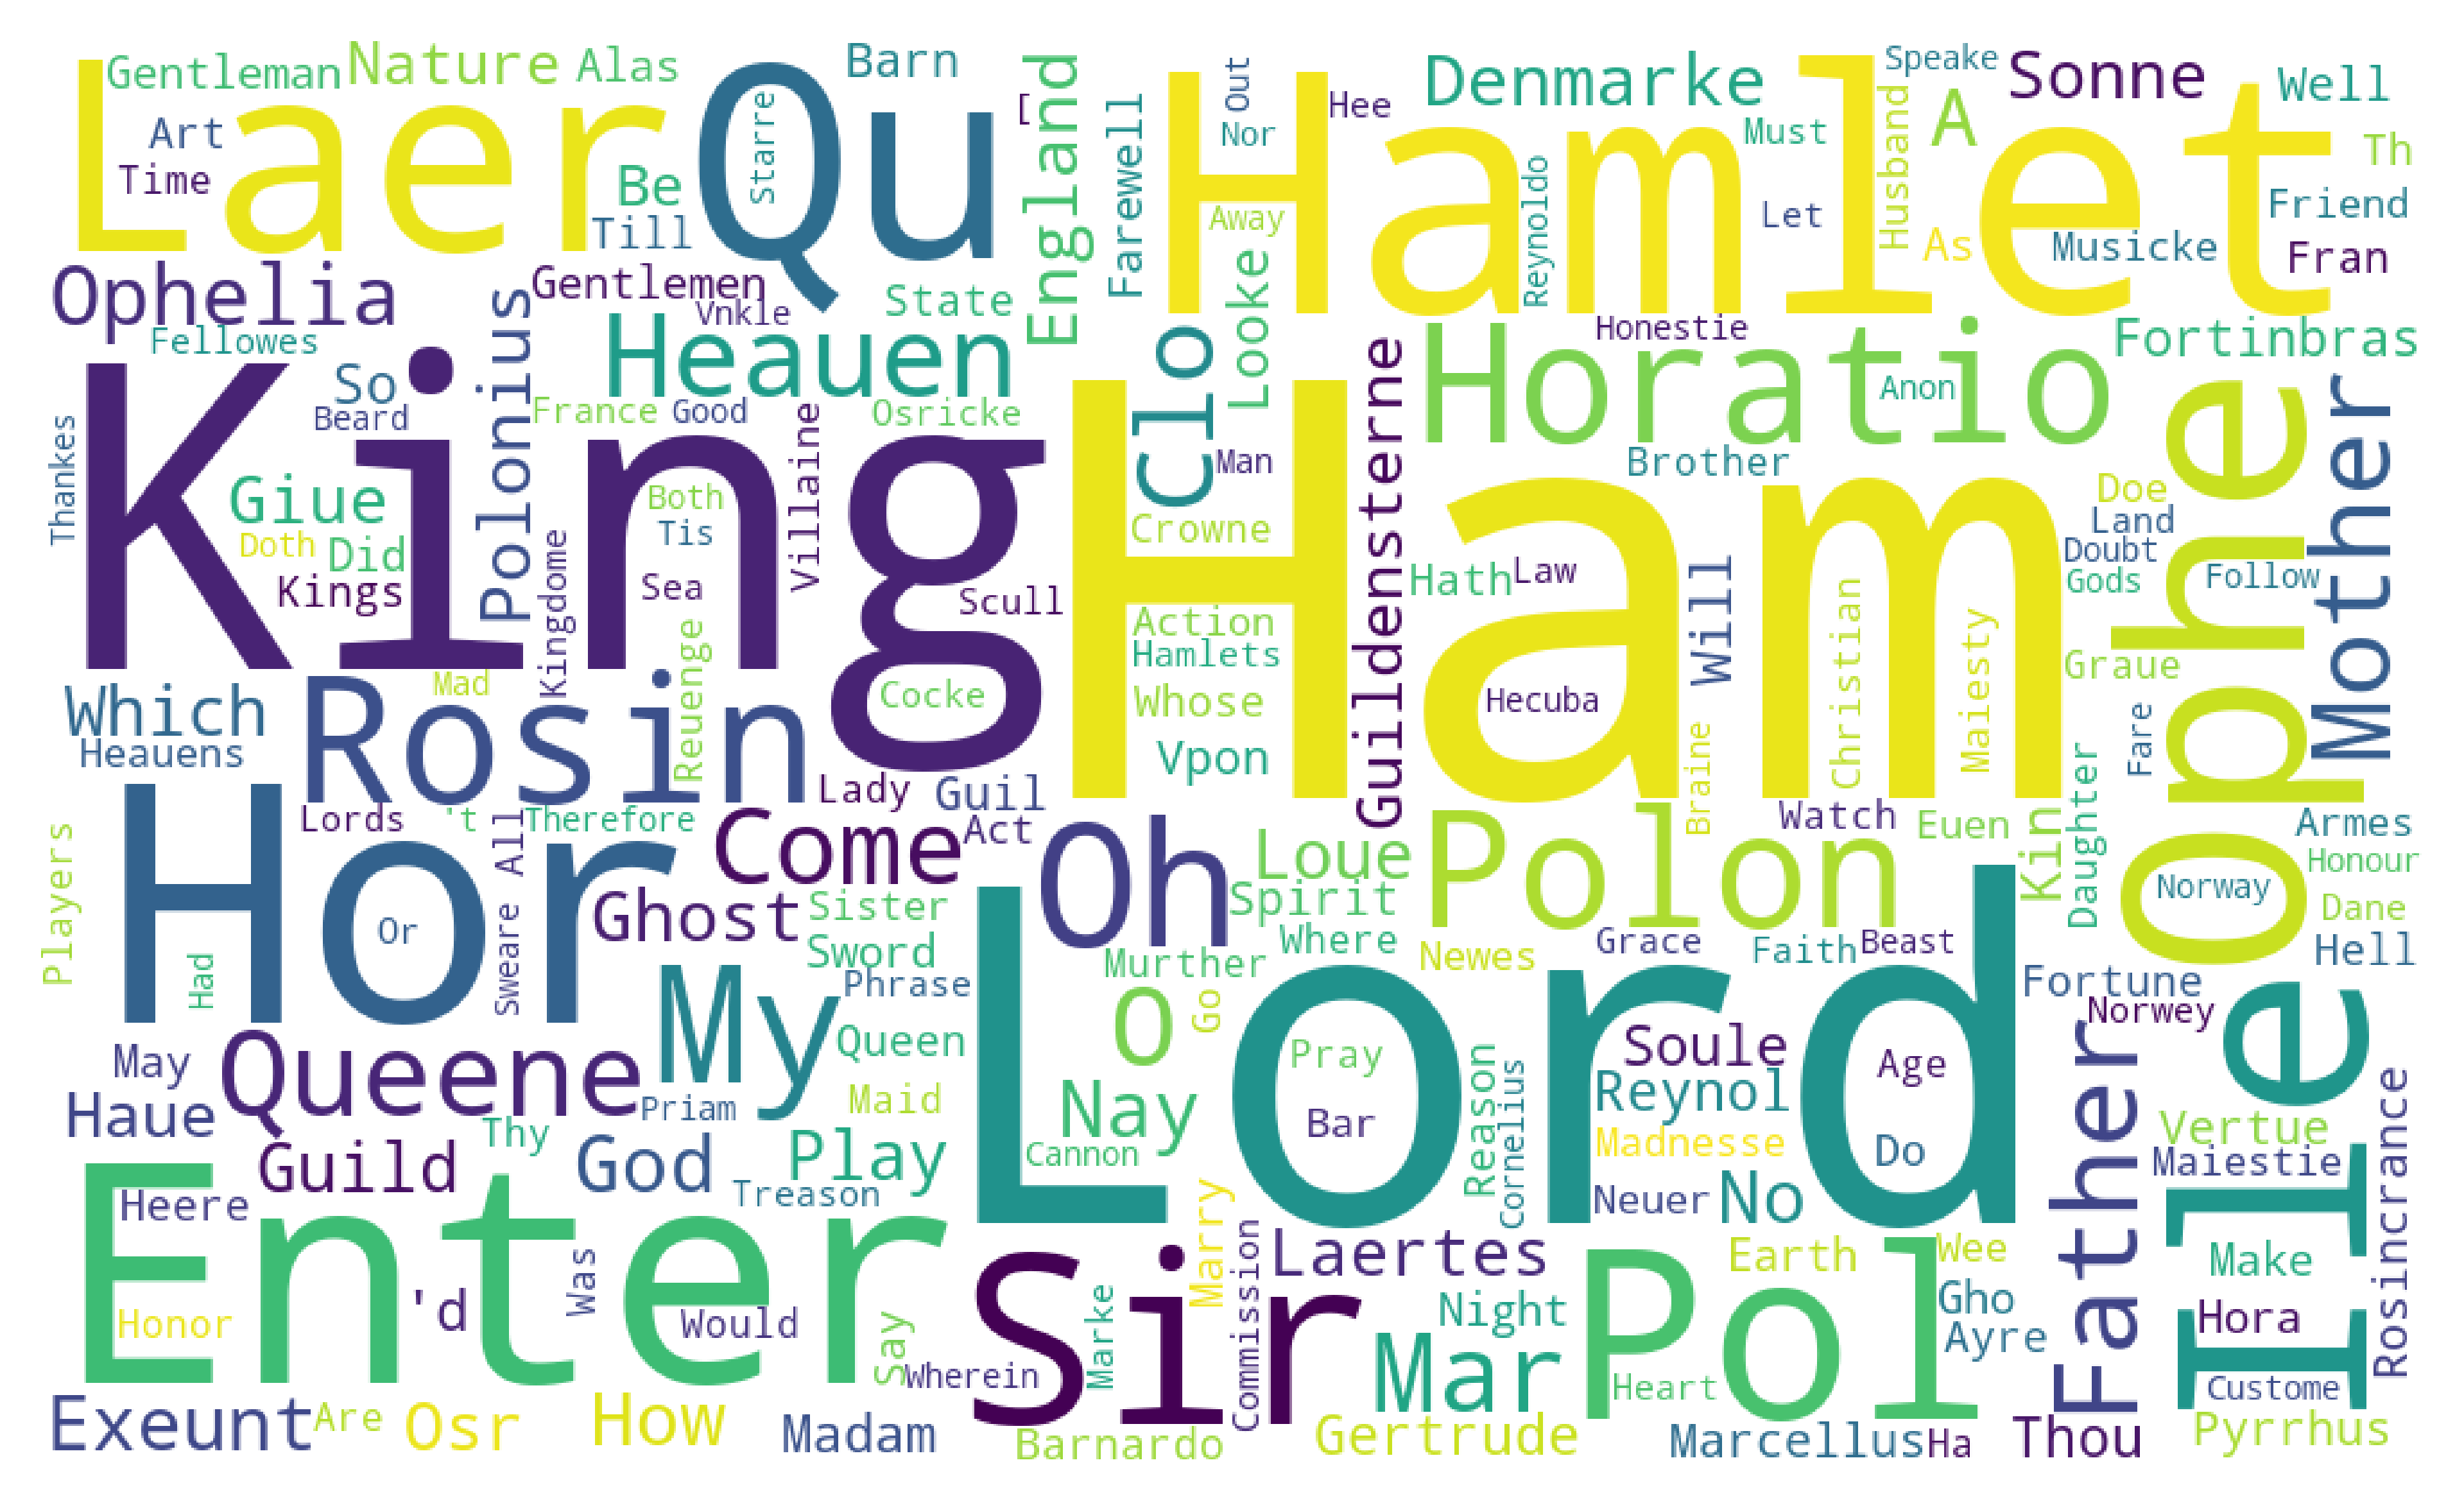

In [45]:
wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

## 한글 자연어 처리
    - KoNLPy 패키지 사용

## KonNLPy 패키지 설치
    - 윈도우에서는 Java1.7 이상 및 Jpype1 패키지를 먼저 설치

```
pip install JPype1
pip install konlpy
```

## KoNLPy 기능

    - 샘플 말뭉치
    
        - kolaw: 헌법 말뭉치
        - kobill: 법안 말뭉치
        
    - 한글 형태소 분석기
        - KoNLPy는 다양한 형태소 분석, 태깅 라이브러리를 파ㅏ이썬에서 쉽게 사용할 수 있도록 모아놓았다.

## 형태소 분석 기능

    - Hannanum: 한나눔. KAIST Semantic Web Research Center 개발
        - http://semanticweb.kaist.ac.kr/hannanum/
    - Kkma: 꼬꼬마. 서울대학교 IDS(Intelligent Data Systems) 연구실 개발
        - http://kkma.snu.ac.kr/
    - Komoran: 코모란. Shineware에서 개발.
    - Mecab: 메카브. 일본어용 형태소 분석기를 한국어를 사용할 수 있도록 수정.
    - Open Korea Text: 오픈 소스 한국어 분석기. 과거 트위터 형태소 분석기.

## 형태소 분석기 기능

    - 각 형태소 분석기는 다음과 같은 공통 메서드 공유
        - nouns: 명사 추출
        - morpha: 형태소 추출
        - pos: 품사 부착

### step1: 헌법 말뭉치

In [46]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [47]:
c = kolaw.open('constitution.txt').read()
print(c[:450])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       


## step 2: 법안 말뭉치

In [48]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [49]:
d = kobill.open('1809890.txt').read()
print(d[:400])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).



### step3: 형태소 분석기 생성

In [53]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
okt = Okt()

# 다음형태소 분석기는 자바등의 연결에 따라 실행이 되지 않을 수 있습니다.
# komoran = Komoran()
# mecab = Mecab()

### step 4: 명사 추출
    
    - 문서에서 명사만 추루하려면 nouns 메서드 사용

In [56]:
hannanum.nouns(c[:40])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동']

In [57]:
kkma.nouns(c[:40])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동']

In [58]:
okt.nouns(c[:40])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동']

### step 5: 형태소 추출
    - 명사 뿐 아니라 모든 품사의 형태소를 알아내려면 morphs 메서드 사용
    - 속도는 okt, 성능은 한나눔이나 꼬꼬마가 나음

In [59]:
hannanum.morphs(c[:40])

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로']

In [60]:
kkma.morphs(c[:40])

['대한민국',
 '헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛나',
 '는',
 '우리',
 '대하',
 'ㄴ',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

In [61]:
okt.morphs(c[:40])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로']

### step 6: 품사 부착

    - pos 명령을 사용하면 품사를 부착한다.
    - 한국어 품사 태그세트로는 형태소 분석기마다 사용하는 품사 태그가 다르므로 각 형태소 분석기에 대한
    문서를 참조한다.
    - 부착되는 품사 태그의 기호와 의미는 tagset 속성으로 확인할 수 있다.

In [62]:
hannanum.pos(c[:40])

[('대한민국헌법', 'N'),
 ('유구', 'N'),
 ('하', 'X'),
 ('ㄴ', 'E'),
 ('역사', 'N'),
 ('와', 'J'),
 ('전통', 'N'),
 ('에', 'J'),
 ('빛', 'N'),
 ('나는', 'J'),
 ('우리', 'N'),
 ('대한국민', 'N'),
 ('은', 'J'),
 ('3·1운동', 'N'),
 ('으로', 'J')]

In [65]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [67]:
kkma.pos(c[:40])

[('대한민국', 'NNG'),
 ('헌법', 'NNG'),
 ('유구', 'NNG'),
 ('하', 'XSV'),
 ('ㄴ', 'ETD'),
 ('역사', 'NNG'),
 ('와', 'JC'),
 ('전통', 'NNG'),
 ('에', 'JKM'),
 ('빛나', 'VV'),
 ('는', 'ETD'),
 ('우리', 'NNM'),
 ('대하', 'VV'),
 ('ㄴ', 'ETD'),
 ('국민', 'NNG'),
 ('은', 'JX'),
 ('3', 'NR'),
 ('·', 'SP'),
 ('1', 'NR'),
 ('운동', 'NNG'),
 ('으로', 'JKM')]

In [66]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [68]:
okt.pos(c[:40])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa')]

In [69]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### step 7: 빈도 분석
    - NLTK의 기능을 사용하여 한글 빈도 분석 가능

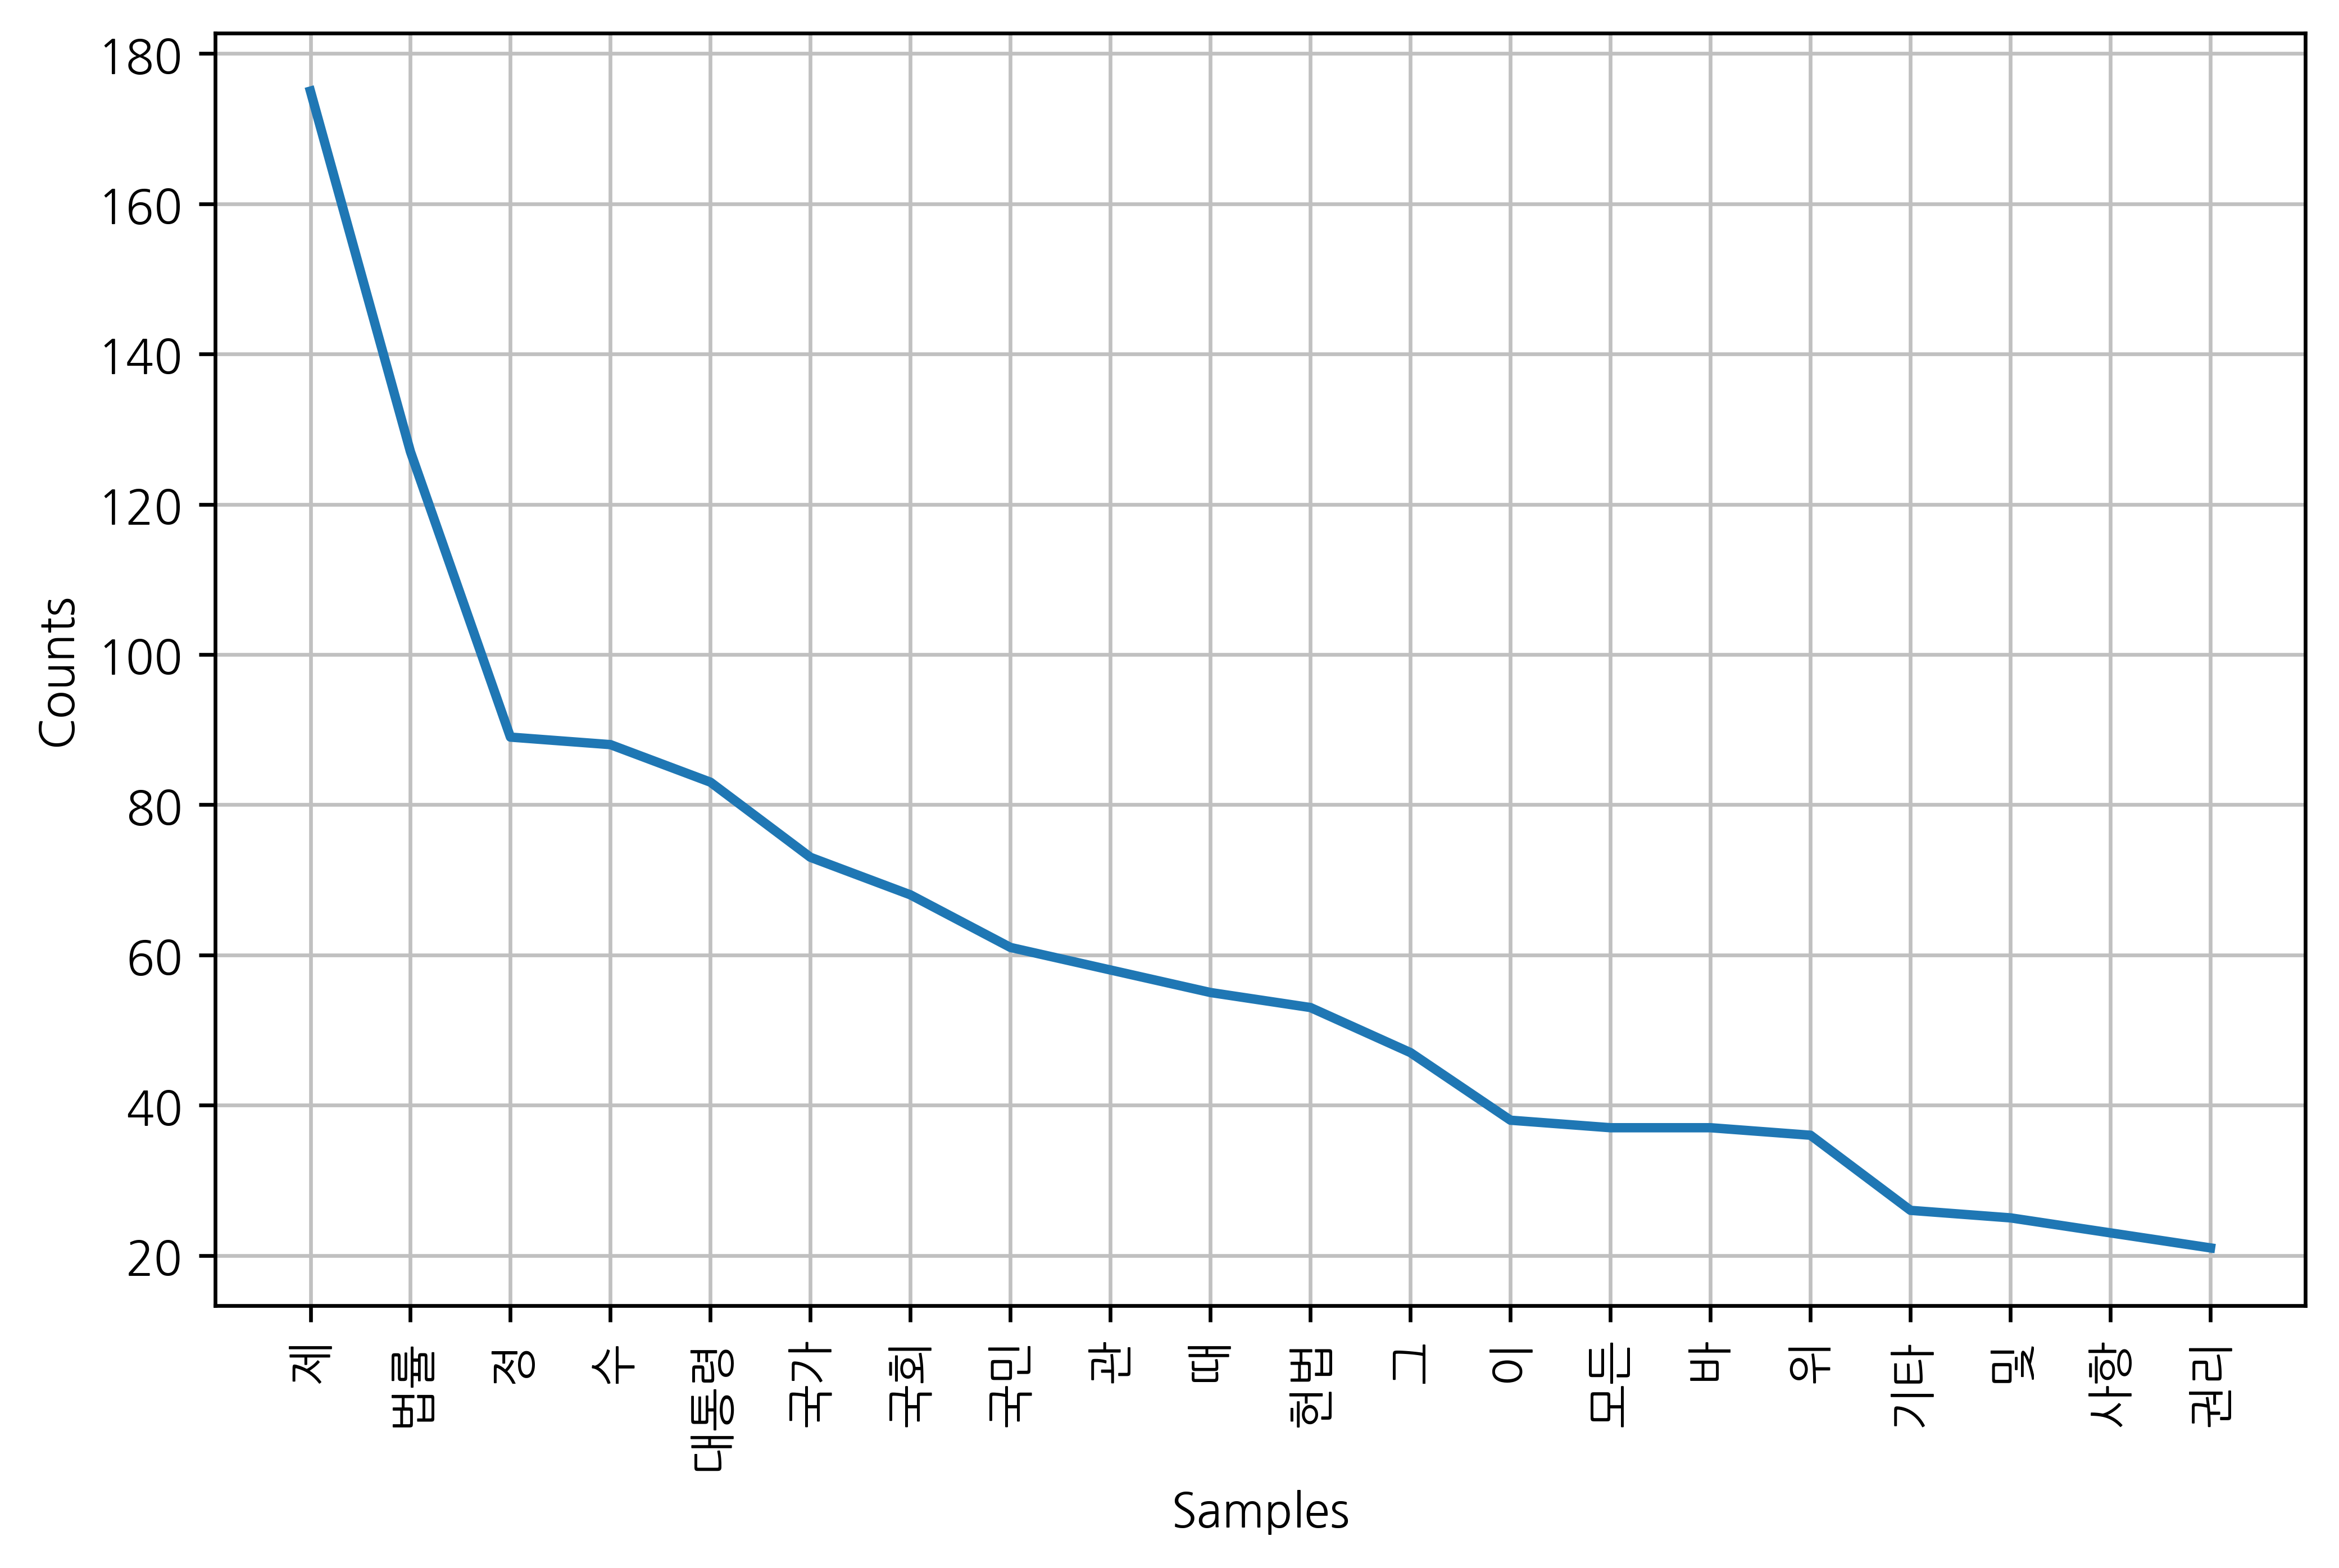

In [70]:
from nltk import Text

kolaw = Text(okt.nouns(c))
kolaw.plot(20)
plt.show()

### step 8: 한글 워드클라우드

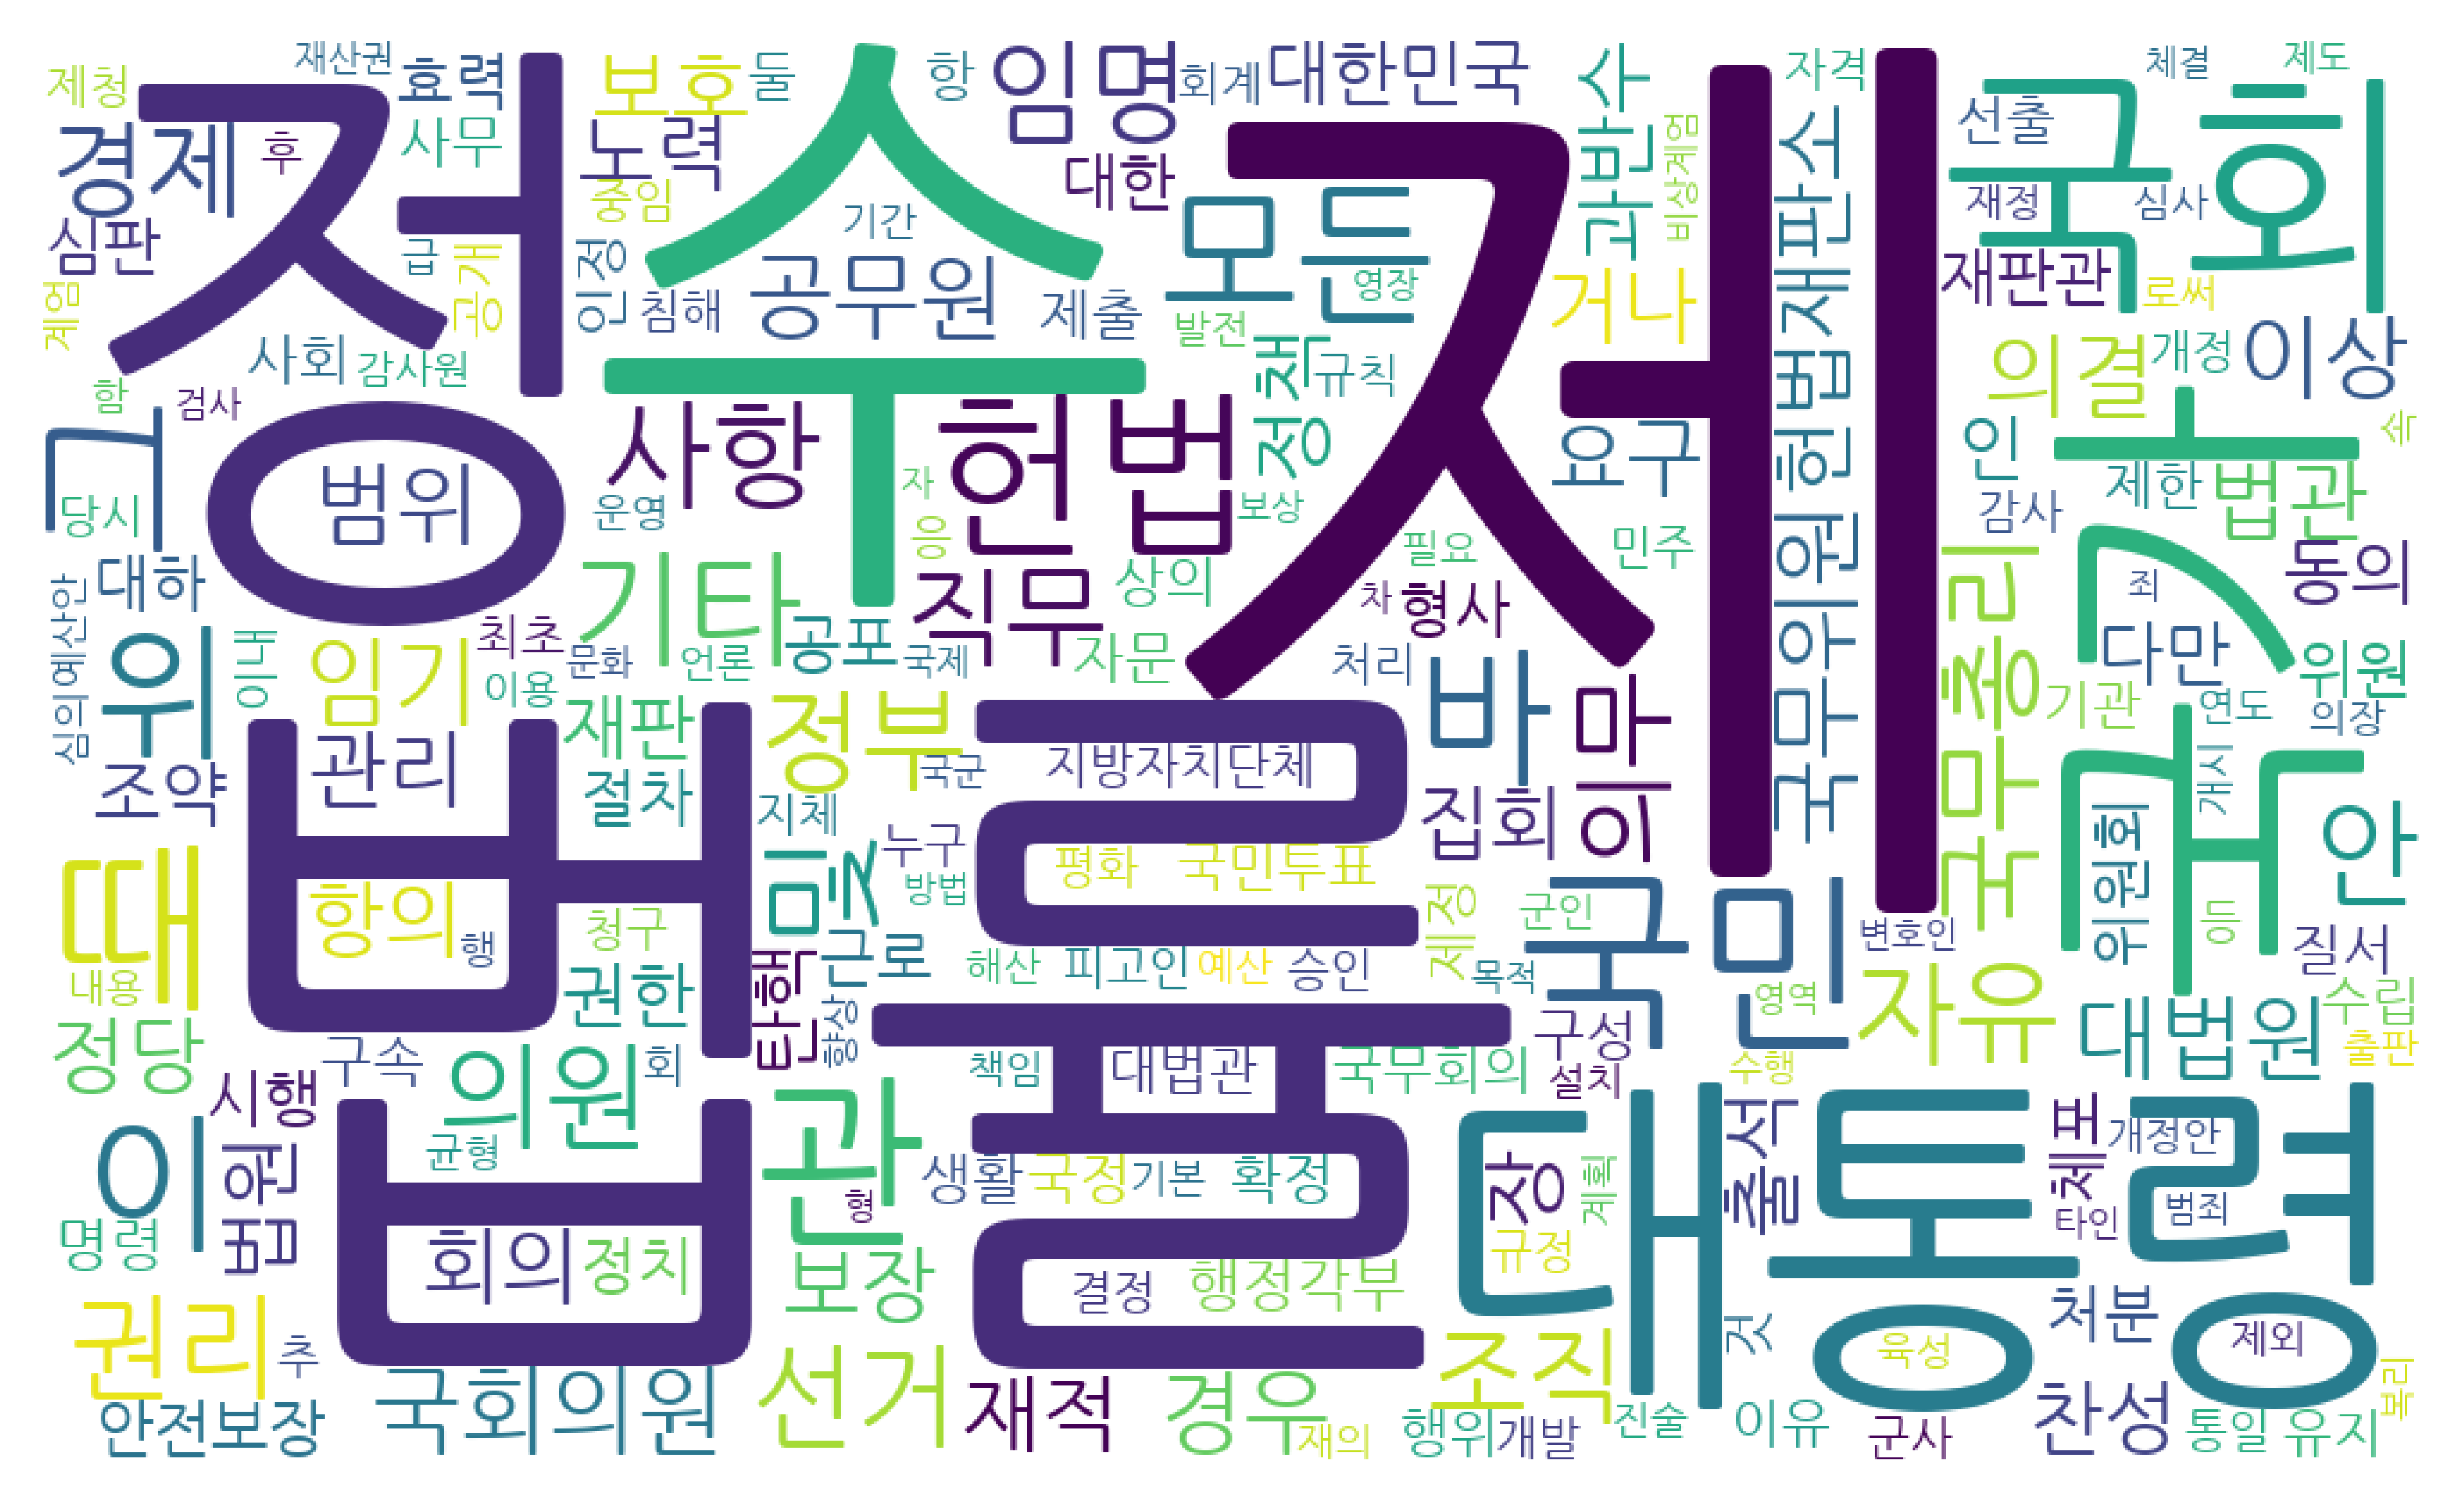

In [71]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 ttf 폰트 경로를 설정
font_path = 'c/windows/fonts/NanumGothic.ttf'

wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

고유명사 같은 경우 잘 판단을 못하는 경우가 있어 노트북을 참고하여 사용자 사전을 추가할 것